<a href="https://colab.research.google.com/github/HienNguyenMinh/ImageProcessing/blob/main/L5_3_Image_Averaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Images to Colab working directory
!pip uninstall gdown -y && pip install gdown
#Create a folder "Images" on Colab
!rm -rf /content/Images
!mkdir Images
#Down load Images from google drive link and import to the Colab folder
!gdown --folder https://drive.google.com/drive/folders/1w9QCEQ_ShE2n3BlBqvyNvEZXYmGi6t2s?usp=share_link -O /content/Images

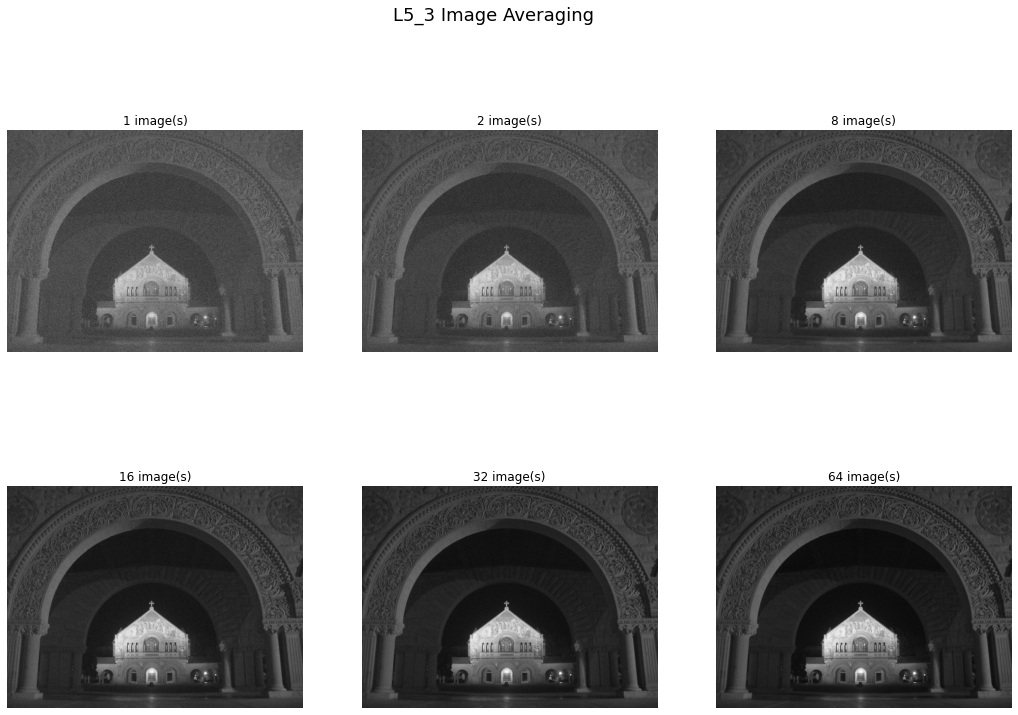

In [6]:
#Exercise Day 3
#L5_3 Image Averaging
#Student: Nguyen Thi Minh Hien

#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import color

#define im2double
def im2double(img):
    return cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

#Define noise_gauss that adds gaussian noisy to image
#Input: 
#   image: original image
#   m: mean value
#   v: varriance value
#Output: return noisyImage after adding gaussian noisy
def noisy_gauss(image, m, v):
   row,col = image.shape
   mean = m
   var = v
   sigma = var**0.5
   gauss = np.random.normal(mean,sigma,(row,col))
   gauss = gauss.reshape(row,col)
   noisyImg = image + gauss
   return noisyImg

#read image
Img = im2double(cv2.imread('/content/Images/quadnight.jfif', cv2.IMREAD_GRAYSCALE))

nArray = [1, 2, 8, 16, 32, 64];
#Create a subplot with rows, columns to show multiple image
fig, ax = plt.subplots(2,len(nArray)//2, figsize=(18,12));
#repeat over number of sample images
for i in range(len(nArray)):
  N = nArray[i];
  avgImg = np.zeros(Img.shape); #initialize an empty image
  
  for j in range(N):
    noisyImg = noisy_gauss(Img, 0, 0.01);
    avgImg = avgImg + noisyImg;    

  avgImg = avgImg / N;
  #show image
  plt.subplot(2, len(nArray)//2, i+1)
  plt.imshow(avgImg, cmap='gray'), plt.title(str(N) + ' image(s)')
  plt.axis('off')

plt.suptitle('L5_3 Image Averaging', fontsize = 18);
plt.show();


